# Guia 1 ejercicio 3


La Botella 1 tiene un llenado de 0.81
La Botella 2 tiene un llenado de 0.83
La Botella 3 tiene un llenado de 0.65
La Botella 4 tiene un llenado de 0.82
La Botella 5 tiene un llenado de 0.82


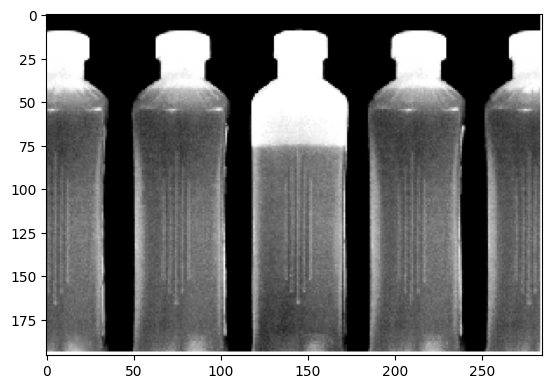

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

botellas = cv.imread(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\botellas.tif", cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(botellas,cmap='gray')
'''plt.plot([0,botellas.shape[1]],[(botellas.shape[0] / 2),(botellas.shape[0] / 2)])
plt.figure()
plt.plot(botellas[int((botellas.shape[0] / 2)),:])'''

##Idenfiticar posiciones de botellas
lineahorizontal = botellas[int((botellas.shape[0] / 2)) , :]
colbotellas = [] #Arreglo que tiene col donde empieza y termina cada botella
flag = True
for i in range(len(lineahorizontal)):
    if  flag and lineahorizontal[i] != 0:
        colbotellas.append(i)
        flag = False
    if (not flag) and lineahorizontal[i] == 0:
        colbotellas.append(i)
        flag = True
colbotellas.append(botellas.shape[1])
#Calculo altura de botella
lineavertical = botellas[: , int((colbotellas[1] - colbotellas[0])/2)]
altura = []
for i in range(len(lineavertical)):
    if lineavertical[i] != 0:
        altura.append(i+1)
        break
altura.append(botellas.shape[0])

llenado = [] #Arreglo que guarda la pos donde aparece el primer gris en cada botella
for i in range(0,10,2):
    col = colbotellas[i] + int((colbotellas[i+1] - colbotellas[i])/2)
    lineavertical = botellas[altura[0]: , col]
    for i in range(len(lineavertical)):
        if lineavertical[i] < 200 and lineavertical[i] > 50:
            llenado.append(i)
            break

alt = (altura[1]-altura[0])
for i in range(5):
    print(f"La Botella {i+1} tiene un llenado de { (alt - llenado[i]) / alt :.2f}")
plt.show()